# Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [22]:
import numpy as np
import pandas as pd
import matplotlib

## Let's load the Gas production:

In [23]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [24]:
# Check how many rows and columns in the dataframe
gas_df.shape

(121, 20)

In [25]:
# Display all the available column names in the dataframe
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [26]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [27]:
# Convert the Month column to a DatetimeIndex
gas_df['Month'] = pd.to_datetime(gas_df['Month'])
gas_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             121 non-null    datetime64[ns]
 1   U.S.                              121 non-null    int64         
 2   Alaska                            121 non-null    int64         
 3   Arkansas                          121 non-null    int64         
 4   Kansas                            121 non-null    int64         
 5   Other States                      121 non-null    int64         
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64         
 7   Wyoming                           121 non-null    int64         
 8   West Virginia                     121 non-null    int64         
 9   Utah                              121 non-null    int64         
 10  Pennsylvania                      121 non-null    

### Check your code

In [28]:
month_type = gas_df['Month'].dtype
from nbresult import ChallengeResult
result = ChallengeResult('date', month_type=month_type, )
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [29]:
gas_df['Month']dt.year.head()

SyntaxError: invalid syntax (3884124850.py, line 1)

In [ ]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

## Yearly Gas production

In [ ]:
yearly_gas_df = gas_df.groupby(gas_df.Month.dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


### Check your code

In [ ]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


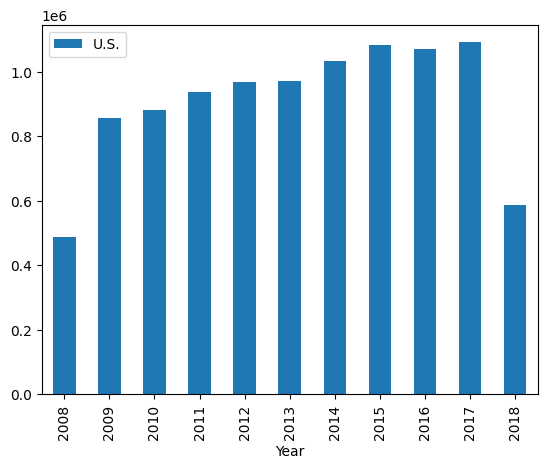

In [30]:
import numpy as np
import pandas as pd
import matplotlib

file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
# Convert the Month column to a DatetimeIndex
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

yearly_gas_df = gas_df.groupby(gas_df.Month.dt.year).sum()

plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")
yearly_gas_df

Text(0.5, 0, 'Year')

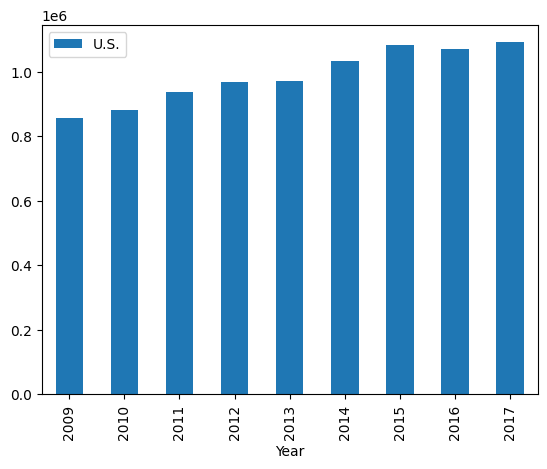

In [43]:

filtered_yearly_gas_df = yearly_gas_df.drop(yearly_gas_df.index[[0,10]])

plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")


### Check your code


In [105]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()
''
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [45]:
filtered_yearly_gas_df.columns[1:].sort_values()
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


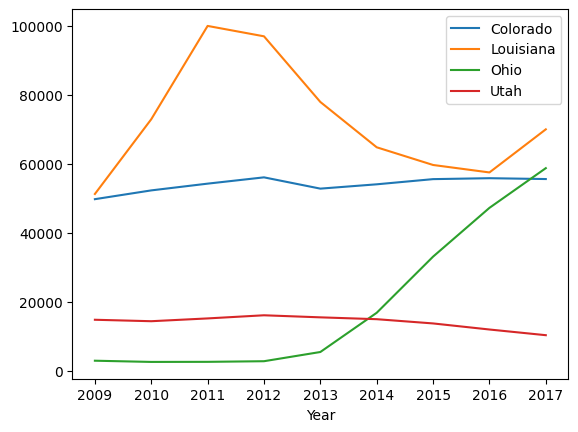

In [46]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year");

---

## Comparing with Crude Oil Production

In [57]:
oil_dif = pd.read_csv("data/U.S._crude_oil_production.csv", decimal=",")
oil_dif["Month"] = pd.to_datetime(oil_dif["Month"])


Text(0.5, 0, 'Year')

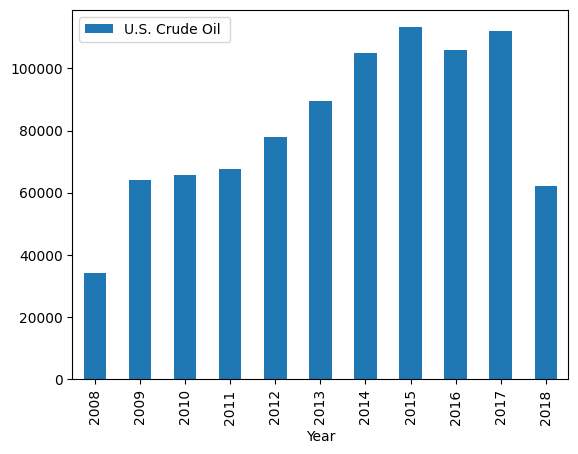

In [72]:
yearly_oil_df = oil_dif.groupby(oil_dif.Month.dt.year).sum()
plot = yearly_oil_df.filter(items=['U.S. Crude Oil ']).plot(kind='bar');
plot.set_xlabel("Year")

In [79]:
filtered_yearly_oil_df = yearly_oil_df.drop(yearly_oil_df.index[[0,10]])
filtered_yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12
2017,112205,224,5936,173,0,5723,4293,20152,186,63,...,623,5454,217,46,2485,310,0,1125,41827,12


Text(0.5, 0, 'Year')

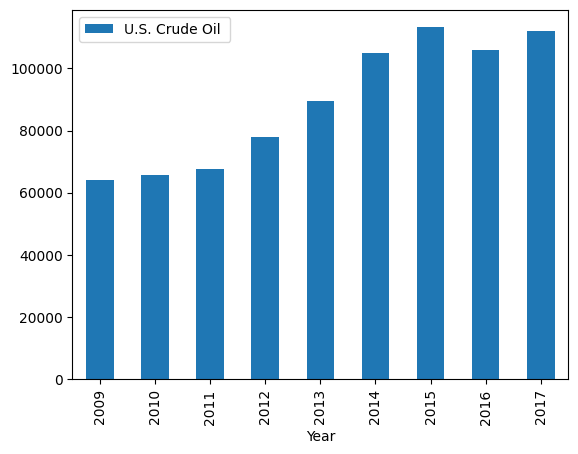

In [82]:
plot = filtered_yearly_oil_df.filter(items=['U.S. Crude Oil ']).plot(kind='bar');
plot.set_xlabel("Year")

### Check your code

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



## Merging Oil and Gas Production

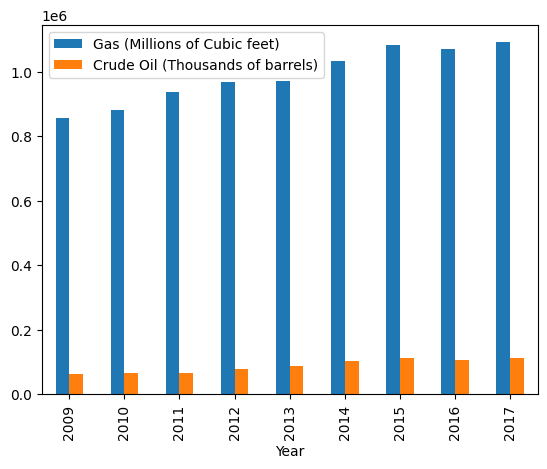

In [103]:
 
# create total_gas dataframe
total_gas = filtered_yearly_gas_df["U.S."]
total_gas.columns = ['Month', 'Gas']

# create total_oil dataframe
total_oil = filtered_yearly_oil_df["U.S. Crude Oil "]
total_oil.columns = ['Month', 'Crude Oil']

merged_df = pd.concat([total_gas, total_oil], axis=1)
merged_df.columns = ['Gas', 'Crude Oil']
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);


### Check your code

In [106]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master



# Check your Code

In [107]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



In [108]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())



============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master

